In [ ]:
import pandas as pd

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
data = pd.read_csv(url)

# Inspect the dataset
print(data.info())
print(data.head())

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# For this dataset, there should be no missing values, but you can fill or drop them as needed.
data = data.dropna()  # Drop rows with missing values (if any)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB
None
         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


Number of rows: 148455, Number of columns: 10

Data Types:
 Date             datetime64[ns]
Country                  object
Confirmed                 int64
Recovered                 int64
Deaths                    int64
Confirmed_MA            float64
Deaths_MA               float64
Recovered_MA            float64
Recovery Rate           float64
RecoveryRate            float64
dtype: object

Summary Statistics:
                                 Date     Confirmed     Recovered  \
count                         148455  1.484550e+05  1.484550e+05   
mean   2021-03-29 23:49:32.609881856  8.011815e+05  1.582396e+05   
min              2020-01-22 00:00:00  1.000000e+00  0.000000e+00   
25%              2020-09-19 00:00:00  3.356000e+03  0.000000e+00   
50%              2021-04-01 00:00:00  3.644700e+04  5.070000e+02   
75%              2021-10-10 00:00:00  3.039185e+05  2.350000e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.

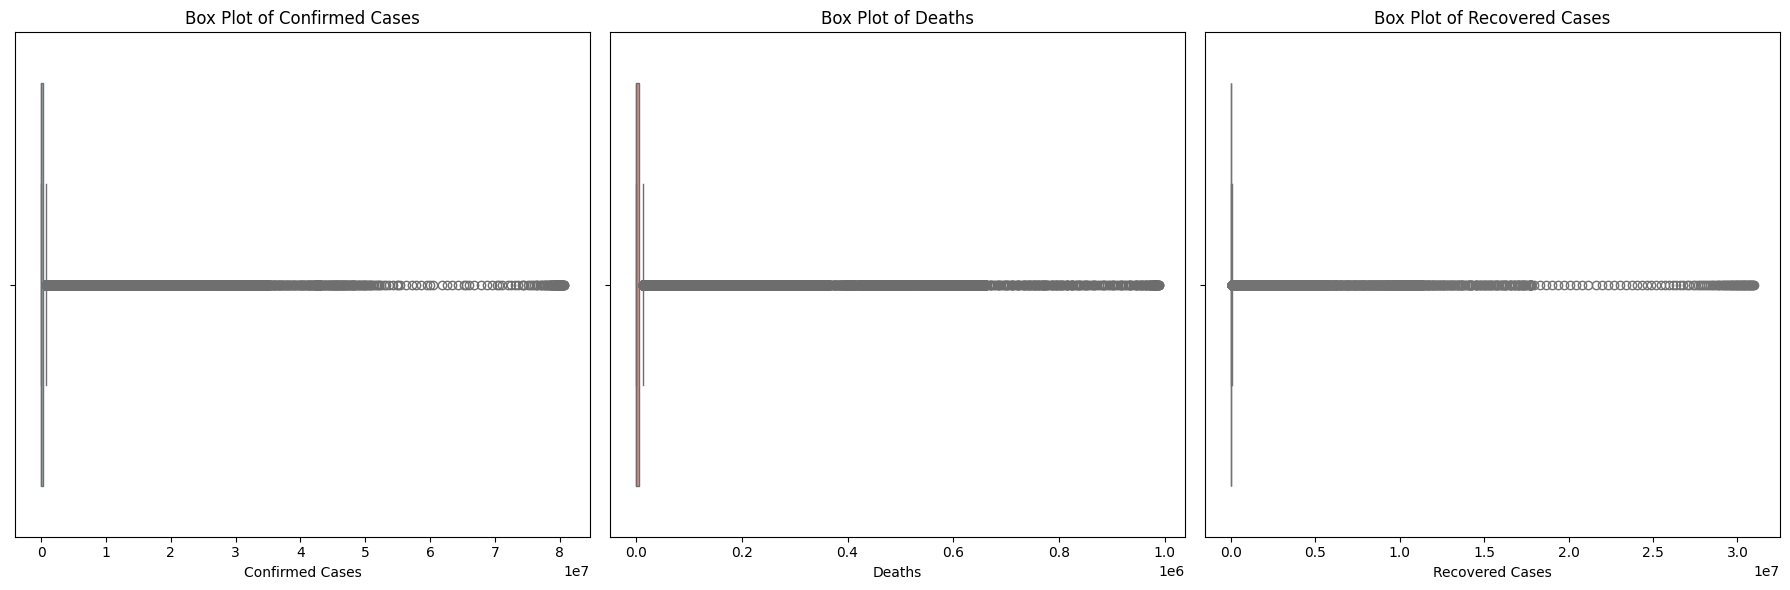

In [ ]:
print(f'Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}')
print("\nData Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())

# Plot horizontal box plots for Confirmed, Deaths, and Recovered cases
plt.figure(figsize=(18, 6))

# Plot for 'Confirmed' cases
plt.subplot(1, 3, 1)
sns.boxplot(x='Confirmed', data=data, color='skyblue')
plt.title('Box Plot of Confirmed Cases')
plt.xlabel('Confirmed Cases')

# Plot for 'Deaths'
plt.subplot(1, 3, 2)
sns.boxplot(x='Deaths', data=data, color='salmon')
plt.title('Box Plot of Deaths')
plt.xlabel('Deaths')

# Plot for 'Recovered'
plt.subplot(1, 3, 3)
sns.boxplot(x='Recovered', data=data, color='lightgreen')
plt.title('Box Plot of Recovered Cases')
plt.xlabel('Recovered Cases')

# Adjust layout
plt.tight_layout()
plt.show()


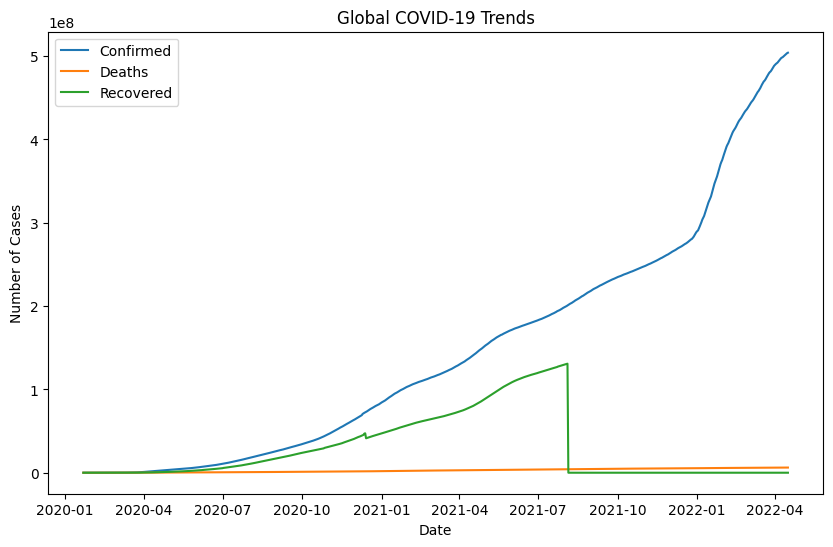

In [ ]:
# Plot global trends of confirmed cases, deaths, and recoveries
plt.figure(figsize=(10, 6))

# Group data by date and sum the values
global_data = data.groupby('Date').sum()

# Plotting
plt.plot(global_data.index, global_data['Confirmed'], label='Confirmed')
plt.plot(global_data.index, global_data['Deaths'], label='Deaths')
plt.plot(global_data.index, global_data['Recovered'], label='Recovered')

plt.title('Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


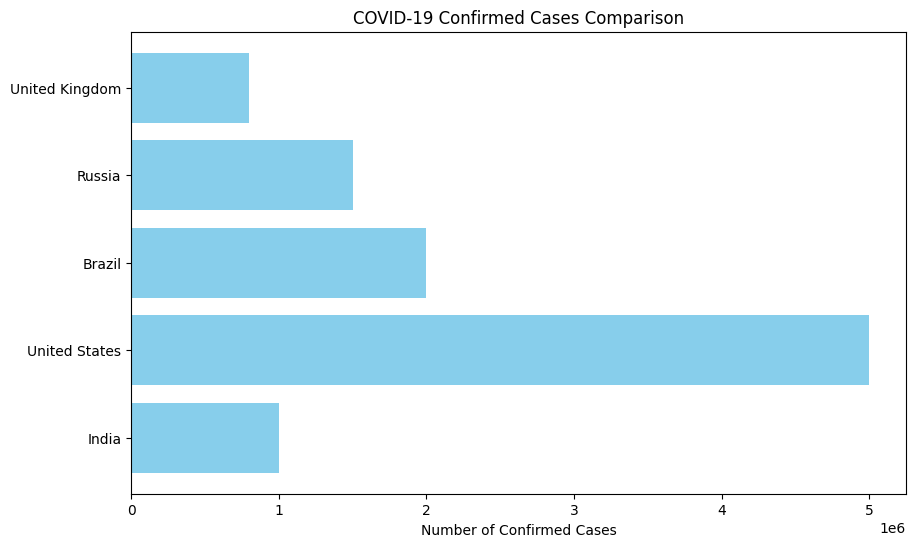

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
countries = ['India', 'United States', 'Brazil', 'Russia', 'United Kingdom']
confirmed_cases = [1000000, 5000000, 2000000, 1500000, 800000]

# Plotting horizontally
plt.figure(figsize=(10, 6))
plt.barh(countries, confirmed_cases, color='skyblue')
plt.xlabel('Number of Confirmed Cases')
plt.title('COVID-19 Confirmed Cases Comparison')

plt.show()


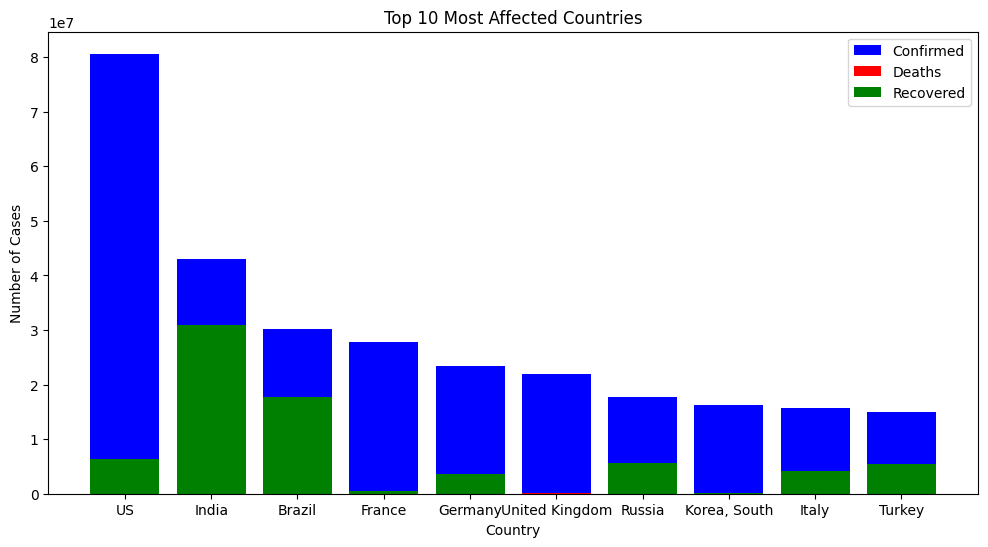

In [ ]:
# Bar plots for comparison of the top 10 most affected countries
top_10_countries = data.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries['Confirmed'], color='blue', label='Confirmed')
plt.bar(top_10_countries.index, top_10_countries['Deaths'], color='red', label='Deaths')
plt.bar(top_10_countries.index, top_10_countries['Recovered'], color='green', label='Recovered')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title('Top 10 Most Affected Countries')
plt.legend()
plt.show()

# Growth rate analysis using moving averages
data['Confirmed_MA'] = data.groupby('Country')['Confirmed'].transform(lambda x: x.rolling(window=7).mean())
data['Deaths_MA'] = data.groupby('Country')['Deaths'].transform(lambda x: x.rolling(window=7).mean())
data['Recovered_MA'] = data.groupby('Country')['Recovered'].transform(lambda x: x.rolling(window=7).mean())


Correlation matrix:
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.956593  -0.070744
Deaths      0.956593  1.000000   0.055685
Recovered  -0.070744  0.055685   1.000000


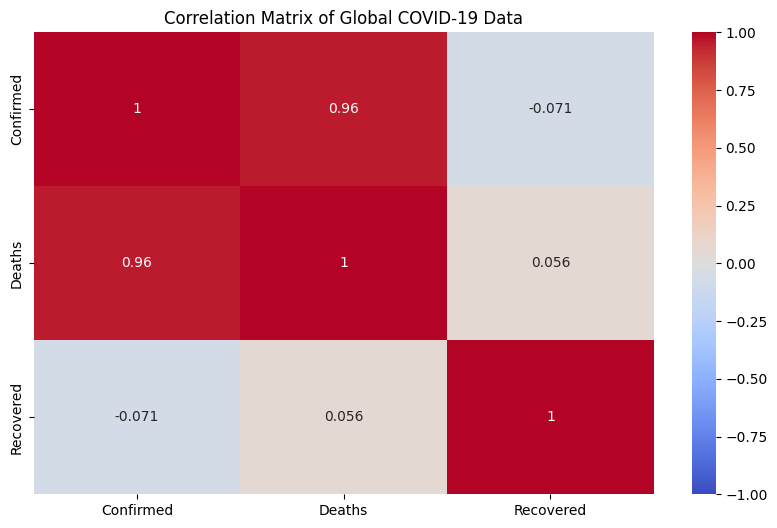

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date to get global statistics
global_data = data.groupby('Date').sum()

# Calculate the correlation matrix
correlation_matrix = global_data[['Confirmed', 'Deaths', 'Recovered']].corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Global COVID-19 Data')
plt.show()

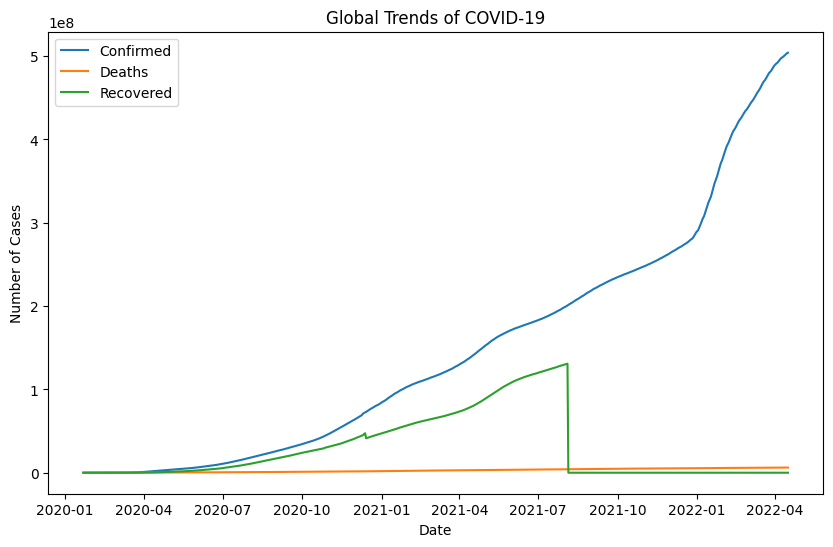

In [ ]:
# Plot the trends globally for confirmed cases, deaths, and recoveries
plt.figure(figsize=(10, 6))
plt.plot(global_data.index, global_data['Confirmed'], label='Confirmed')
plt.plot(global_data.index, global_data['Deaths'], label='Deaths')
plt.plot(global_data.index, global_data['Recovered'], label='Recovered')
plt.title('Global Trends of COVID-19')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [ ]:
latest_data = data[data['Date'] == data['Date'].max()]
top_country = latest_data.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(1)
print(top_country)


         Confirmed  Deaths  Recovered
Country                              
US        80625120  988609          0


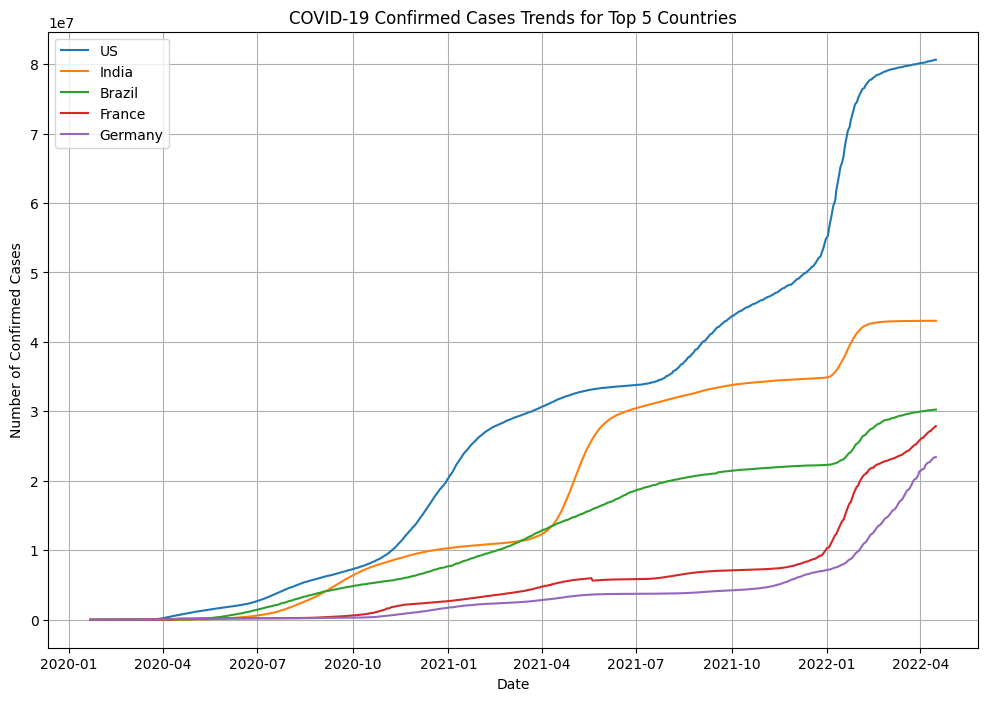

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Find the latest date in the dataset
latest_date = data['Date'].max()

# Filter data for the latest date
latest_data = data[data['Date'] == latest_date]

# Select top 5 countries with the highest confirmed cases on the latest date
top_5_countries = latest_data.sort_values(by='Confirmed', ascending=False).head(5)['Country']

# Plot comparative trends for the top 5 countries
plt.figure(figsize=(12, 8))

for country in top_5_countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('COVID-19 Confirmed Cases Trends for Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

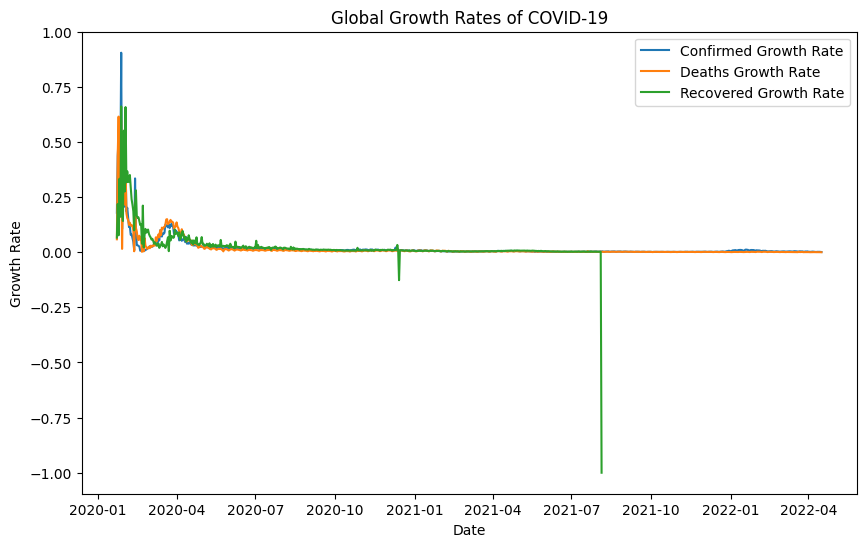

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(global_data.index, global_data['Confirmed'].pct_change(), label='Confirmed Growth Rate')
plt.plot(global_data.index, global_data['Deaths'].pct_change(), label='Deaths Growth Rate')
plt.plot(global_data.index, global_data['Recovered'].pct_change(), label='Recovered Growth Rate')
plt.title('Global Growth Rates of COVID-19')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()


In [ ]:
cumulative_top_10 = latest_data.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(10)
print(cumulative_top_10)


                Confirmed  Deaths  Recovered
Country                                     
US               80625120  988609          0
India            43042097  521751          0
Brazil           30250077  662185          0
France           27874269  145159          0
Germany          23416663  132942          0
United Kingdom   21916961  172014          0
Russia           17801103  365774          0
Korea, South     16305752   21092          0
Italy            15659835  161602          0
Turkey           14991669   98551          0


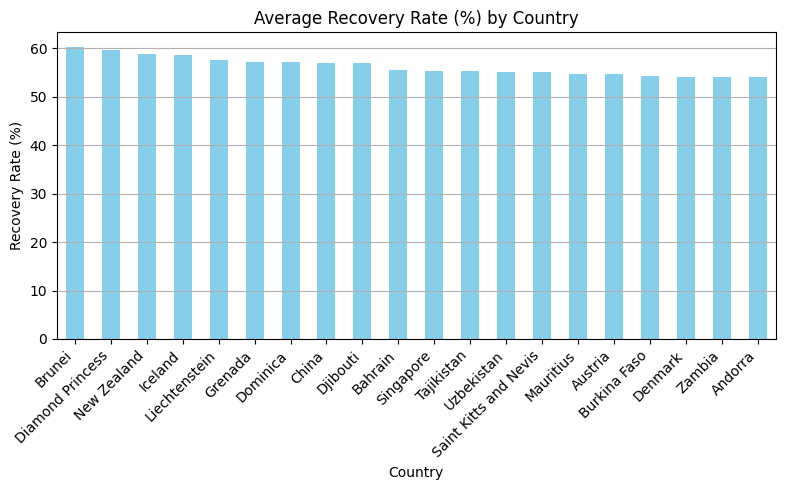

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Calculate recovery rate (%) for each country
data['RecoveryRate'] = (data['Recovered'] / data['Confirmed']) * 100

# Group by country and calculate average recovery rate
country_recovery_rates = data.groupby('Country')['RecoveryRate'].mean()

# Sort countries by recovery rate descending
country_recovery_rates = country_recovery_rates.sort_values(ascending=False)

# Plotting the recovery rates for each country
plt.figure(figsize=(8, 5))
country_recovery_rates.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Recovery Rate (%) by Country')
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

Country          object
Confirmed         int64
Recovered         int64
Deaths            int64
Confirmed_MA    float64
Deaths_MA       float64
Recovered_MA    float64
dtype: object
Numeric columns for correlation analysis:
            Confirmed  Recovered  Deaths  Confirmed_MA  Deaths_MA  \
Date                                                                
2020-01-22        557         30      17           0.0        0.0   
2020-01-23        657         32      18           0.0        0.0   
2020-01-24        944         39      26           0.0        0.0   
2020-01-25       1437         42      42           0.0        0.0   
2020-01-26       2120         56      56           0.0        0.0   

            Recovered_MA  
Date                      
2020-01-22           0.0  
2020-01-23           0.0  
2020-01-24           0.0  
2020-01-25           0.0  
2020-01-26           0.0  
Correlation matrix:
              Confirmed  Recovered    Deaths  Confirmed_MA  Deaths_MA  \
Confirmed 

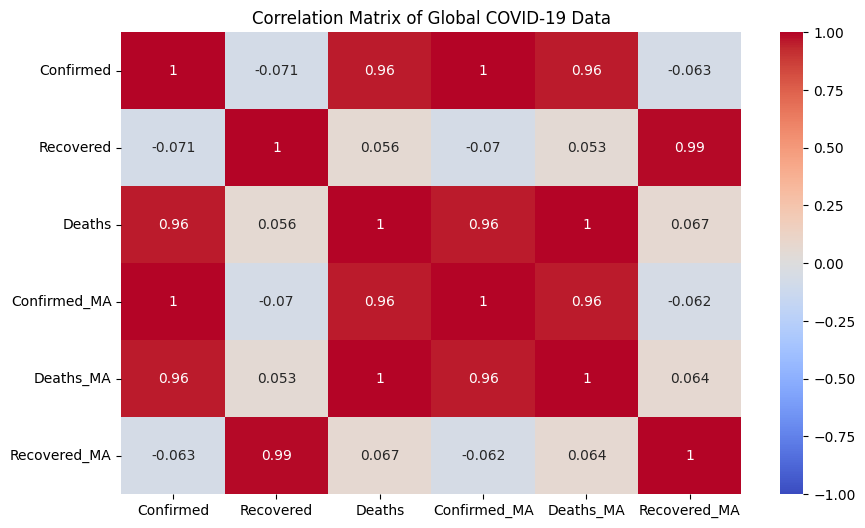

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date to get global statistics
global_data = data.groupby('Date').sum()

# Check the data types of columns
print(global_data.dtypes)

# Ensure only numeric columns are selected for correlation
numeric_columns = global_data.select_dtypes(include=[np.number])

# Print numeric columns to verify
print("Numeric columns for correlation analysis:")
print(numeric_columns.head())

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Global COVID-19 Data')
plt.show()

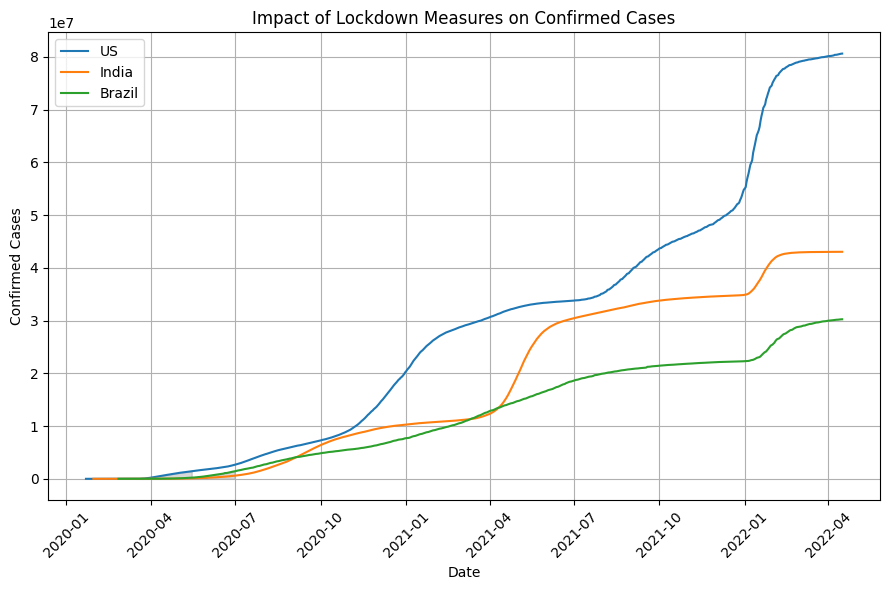

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Example: Define lockdown periods for selected countries (adjust as per your data)
lockdown_periods = {
    'US': ('2020-03-15', '2020-05-15'),
    'India': ('2020-04-01', '2020-05-31'),
    'Brazil': ('2020-03-20', '2020-06-30')
}

# Plot trends for confirmed cases in each country
plt.figure(figsize=(9, 6))

for country, (start_date, end_date) in lockdown_periods.items():
    data_country = data[data['Country'] == country]
    data_lockdown = data_country[(data_country['Date'] >= start_date) & (data_country['Date'] <= end_date)]

    plt.plot(data_country['Date'], data_country['Confirmed'], label=f'{country}')
    plt.fill_between(data_lockdown['Date'], data_lockdown['Confirmed'], color='gray', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Impact of Lockdown Measures on Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


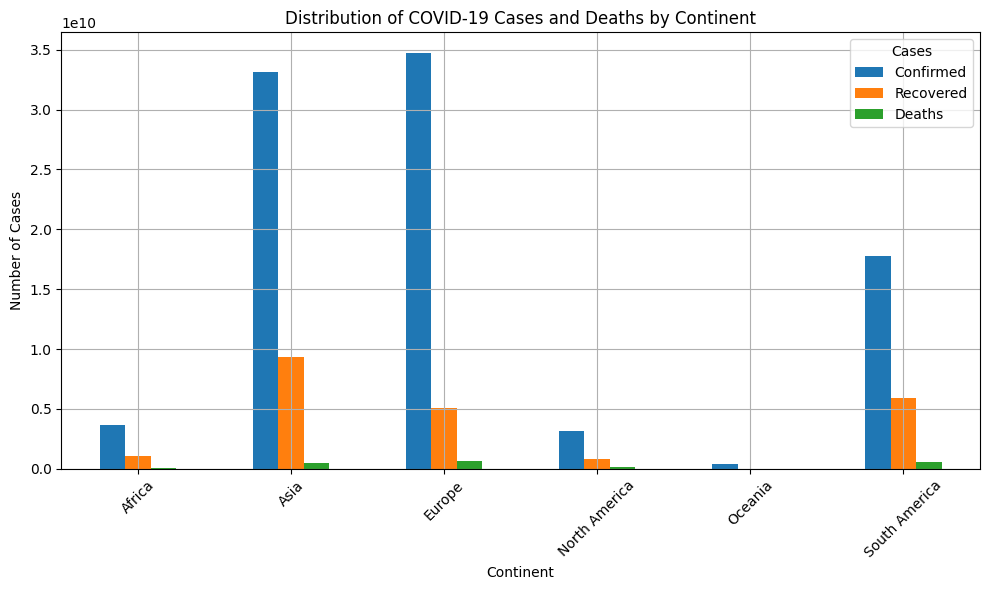

In [ ]:
country_to_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Anguilla": "North America",
    "Antigua & Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Aruba": "North America",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bermuda": "North America",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia & Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Cape Verde": "Africa",
    "Cayman Islands": "North America",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Congo": "Africa",
    "Cook Islands": "Oceania",
    "Costa Rica": "North America",
    "Cote D Ivoire": "Africa",
    "Croatia": "Europe",
    "Cruise Ship": None,  # Assuming no specific continent for cruise ships
    "Cuba": "North America",
    "Cyprus": "Asia",  # Technically part of Asia, politically part of Europe
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Equatorial Guinea": "Africa",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Falkland Islands": "South America",
    "Faroe Islands": "Europe",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Polynesia": "Oceania",
    "French West Indies": "North America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Gibraltar": "Europe",
    "Greece": "Europe",
    "Greenland": "North America",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guatemala": "North America",
    "Guernsey": "Europe",
    "Guinea": "Africa",
    "Guinea Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hong Kong": "Asia",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Isle of Man": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jersey": "Europe",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kuwait": "Asia",
    "Kyrgyz Republic": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macau": "Asia",
    "Macedonia": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Montserrat": "North America",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Namibia": "Africa",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "Netherlands Antilles": "North America",
    "New Caledonia": "Oceania",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Reunion": "Africa",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Pierre & Miquelon": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Satellite": None,  # Assuming no specific continent for satellite
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "St Kitts & Nevis": "North America",
    "St Lucia": "North America",
    "St Vincent": "North America",
    "St. Lucia": "North America",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Timor L'Este": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad & Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Turks & Caicos": "North America",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Virgin Islands (US)": "North America",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "North Macedonia": "Europe",
    "Comoros": "Africa",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Vanuatu": "Oceania",
    "Eritrea": "Africa",
    "Cabo Verde": "Africa",
    "Congo (Kinshasa)": "Africa",
    "Congo (Brazzaville)": "Africa",
    "Solomon Islands": "Oceania",
    "Central African Republic": "Africa",
    "Timor-Leste": "Asia",
    "Somalia": "Africa",
    "South Sudan": "Africa",
    "Kiribati": "Oceania",
    "Burma": "Asia",
}
Country_to_continent = {country: continent for country, continent in country_to_continent.items() if continent is not None}

# Add columns for Continent to DataFrame
data['Continent'] = data['Country'].map(country_to_continent)

# Aggregate data by Continent
continent_data = data.groupby('Continent')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Plotting the distribution
import matplotlib.pyplot as plt

continent_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Cases and Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Cases')
plt.grid(True)
plt.tight_layout()
plt.show()
